In [7]:
from sklearn.datasets import make_regression
N=1000
p=20
X,y =make_regression(n_samples=N, n_features=p,noise=1 , random_state=42)
print(X.shape, y. shape)

(1000, 20) (1000,)


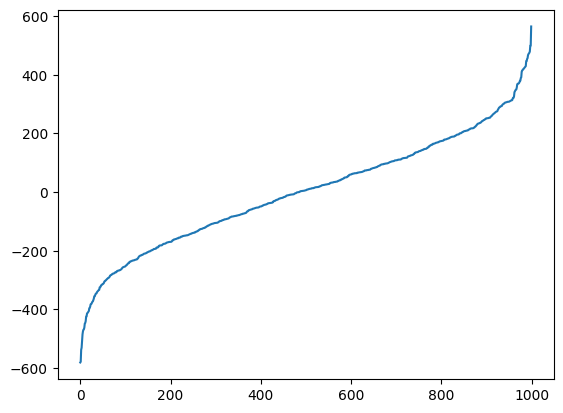

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show()

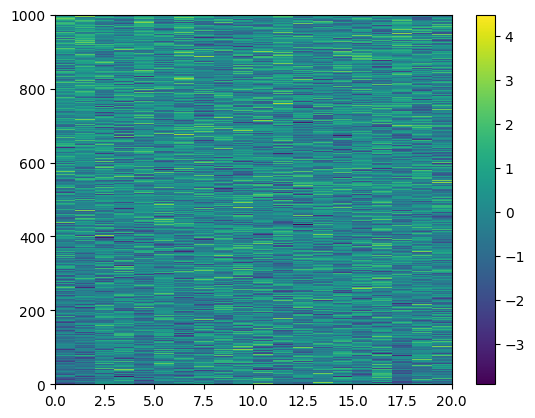

In [9]:

ind=np.argsort(y)
plt.pcolormesh(X[ind])
plt.colorbar()
plt.show()

In [10]:
def mincua_reg(X,y, lambda_= 1e-3):#ajustar #fit #optimizar
  alpha=np.linalg.inv( X.T.dot(X)+ lambda_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


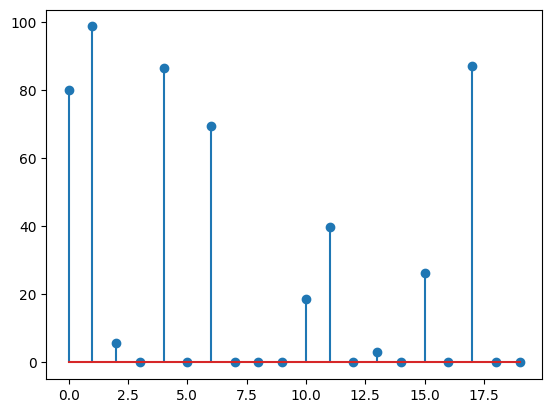

In [11]:
alpha =mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))
plt.show()

In [12]:
ypred= X.dot(alpha)

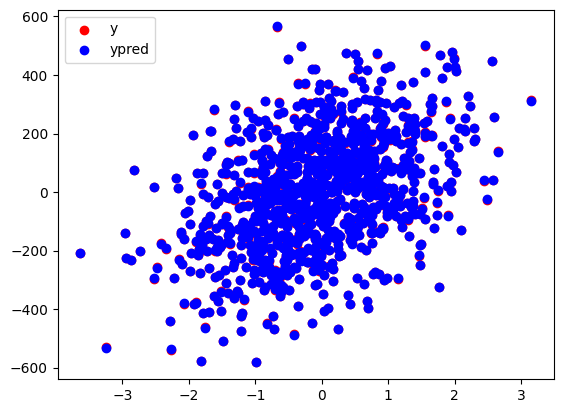

In [13]:
plt.scatter(X[ind,0],y[ind], color='red', label='y')
plt.scatter(X[ind,0],ypred[ind], color='blue', label='ypred')
plt.legend()
plt.show()

In [14]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


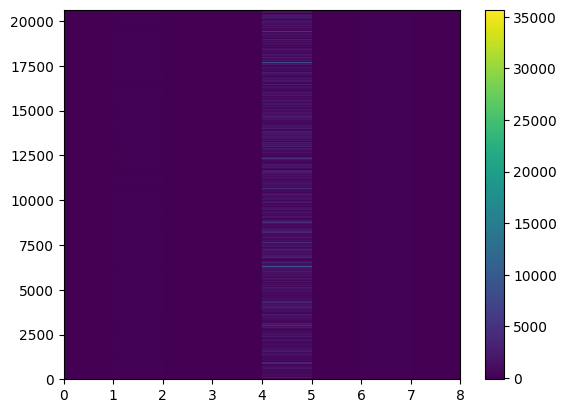

In [15]:
X=housing.data
y=housing.target
print(X.shape, y.shape)
plt.pcolormesh(X)
plt.colorbar()
plt.show()

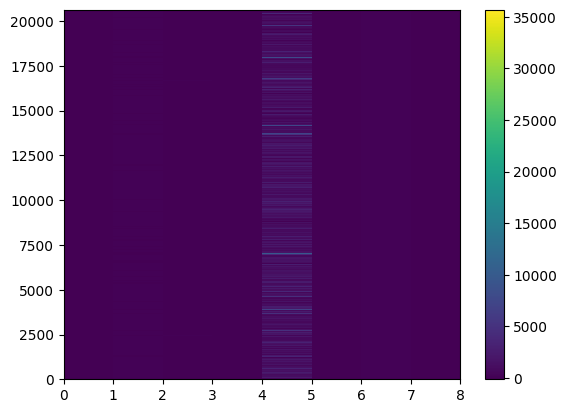

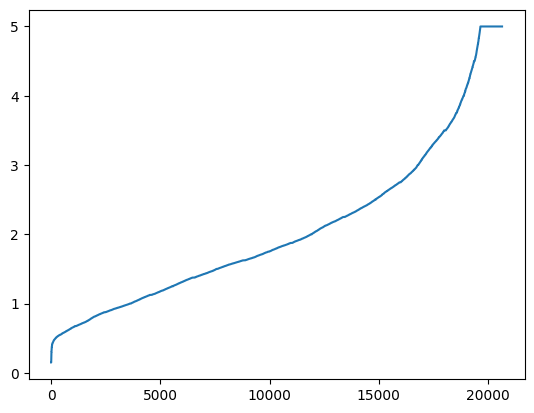

In [16]:
ind = np.argsort(y)
plt.pcolormesh(X[ind])
plt.colorbar()
plt.show()
plt.plot(y[ind])
plt.show()

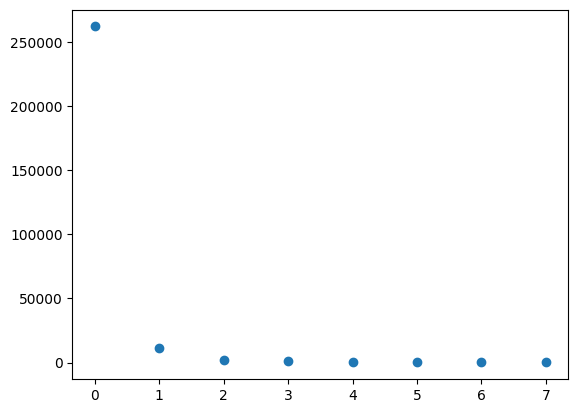

In [17]:
U, S, Vh = np.linalg.svd(X)
plt.scatter(np.arange(len(S)),S)
plt.show()

In [18]:
def mincua_reg(X,y, lambda_= 1e-3):#ajustar #fit #optimizar
  alpha=np.linalg.inv( X.T.dot(X)+ lambda_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


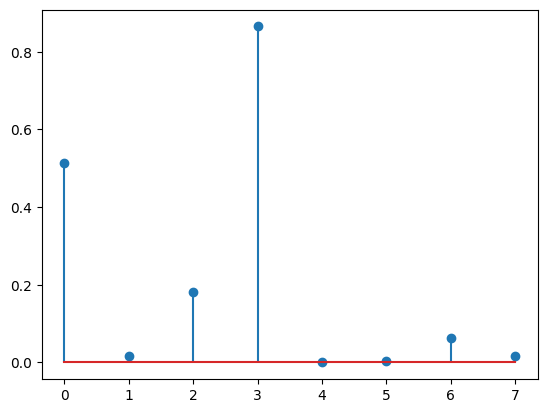

In [19]:
alpha =mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))
plt.show()

In [20]:
ypred = X.dot(alpha)

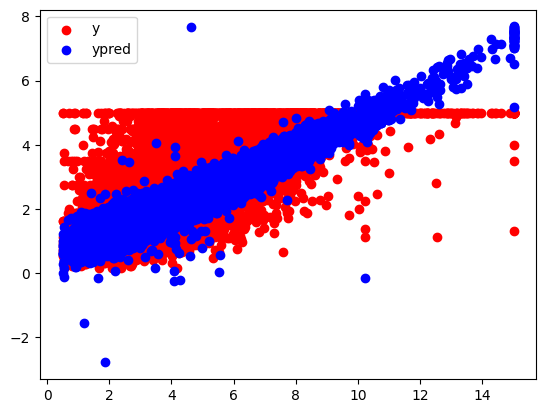

In [21]:
plt.scatter(X[ind,0],y[ind], color='red', label='y')
plt.scatter(X[ind,0],ypred[ind], color='blue', label='ypred')
plt.legend()
plt.show()

**EJERCICIO 1:**
SOLUCION POR GRADIENTE


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generación de datos sintéticos para regresión lineal simple
# Usaremos una semilla diferente para generar datos distintos
np.random.seed(42)
caracteristica_x = 3 * np.random.rand(150, 1) # 150 puntos de datos
variable_objetivo_y = 5 + 2 * caracteristica_x + np.random.randn(150, 1) # y = 5 + 2*x + ruido

# Añadir columna de unos para el término de intercepto
X_con_intercepto = np.c_[np.ones((150, 1)), caracteristica_x]

In [23]:
def calcular_costo_mse(X, y, parametros):
    """Calcula el Error Cuadrático Medio (MSE)."""
    m = len(y)
    predicciones = X.dot(parametros)
    error = predicciones - y
    costo = (1/2/m) * np.dot(error.T, error) # Uso de np.dot para la suma de cuadrados
    return costo[0][0] # Devolver el valor escalar del costo

In [24]:
def calcular_gradiente_mse(X, y, parametros):
    """Calcula el gradiente de la función de costo MSE."""
    m = len(y)
    predicciones = X.dot(parametros)
    error = predicciones - y
    gradiente = (1/m) * X.T.dot(error)
    return gradiente

In [25]:
def optimizar_por_gradiente(X, y, parametros_iniciales, tasa_aprendizaje, num_iteraciones):
    """Aplica el descenso de gradiente para encontrar los parámetros óptimos."""
    parametros = parametros_iniciales.copy()
    historial_costo = []

    for i in range(num_iteraciones):
        grad = calcular_gradiente_mse(X, y, parametros)
        parametros = parametros - tasa_aprendizaje * grad
        costo_actual = calcular_costo_mse(X, y, parametros)
        historial_costo.append(costo_actual)

    return parametros, historial_costo

Parámetros finales (intercepto, coeficiente) obtenidos: [4.85544758 2.11809432]
Valor del costo final (MSE): 0.5291693831856417


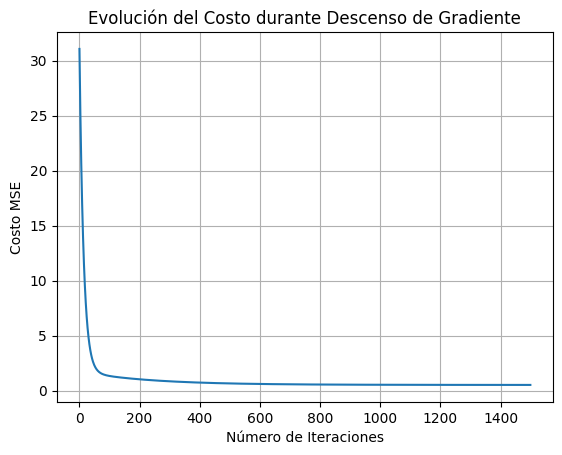

In [26]:
# Inicialización de parámetros
parametros_iniciales = np.zeros((X_con_intercepto.shape[1], 1))

# Configuración del algoritmo
tasa_aprendizaje = 0.01
num_iteraciones = 1500 # Aumentamos las iteraciones

# Ejecutar el proceso de optimización
parametros_optimos, historial_costo_evolucion = optimizar_por_gradiente(
    X_con_intercepto, variable_objetivo_y, parametros_iniciales, tasa_aprendizaje, num_iteraciones)

print("Parámetros finales (intercepto, coeficiente) obtenidos:", parametros_optimos.flatten()) # Usar flatten para mejor visualización
print("Valor del costo final (MSE):", historial_costo_evolucion[-1])

# Visualizar la evolución del costo
plt.plot(historial_costo_evolucion)
plt.xlabel("Número de Iteraciones")
plt.ylabel("Costo MSE")
plt.title("Evolución del Costo durante Descenso de Gradiente")
plt.grid(True)
plt.show()

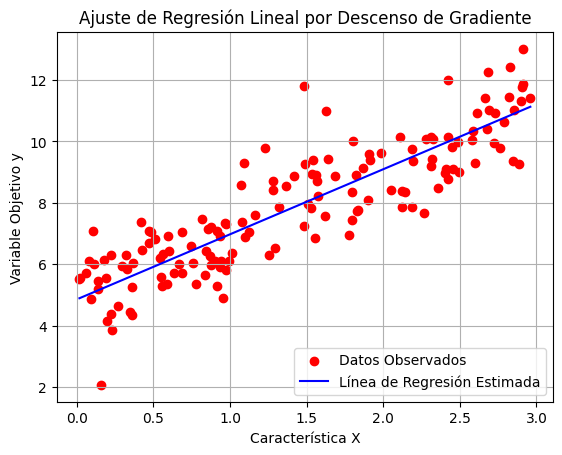

In [27]:
# Gráfica de los datos originales y la línea de regresión
plt.scatter(caracteristica_x, variable_objetivo_y, color='red', label='Datos Observados')

# Calcular los valores de y predichos para graficar la línea
# Necesitamos los puntos mínimo y máximo de X para dibujar la línea
puntos_x_linea = np.array([[caracteristica_x.min()], [caracteristica_x.max()]])
puntos_x_linea_b = np.c_[np.ones((2, 1)), puntos_x_linea] # Añadir intercepto
predicciones_linea = puntos_x_linea_b.dot(parametros_optimos)

plt.plot(puntos_x_linea, predicciones_linea, color='blue', label='Línea de Regresión Estimada')
plt.xlabel("Característica X")
plt.ylabel("Variable Objetivo y")
plt.title("Ajuste de Regresión Lineal por Descenso de Gradiente")
plt.legend()
plt.grid(True)
plt.show()

[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


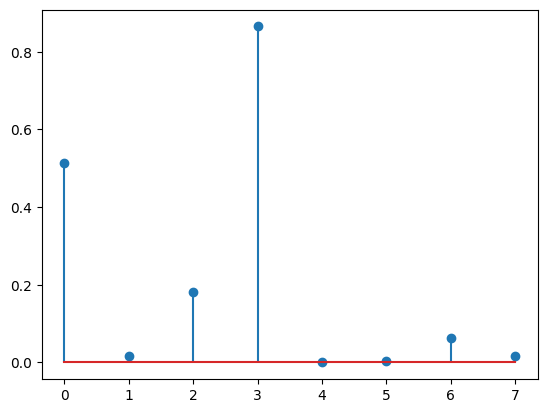

In [28]:
alpha = mincua_reg(X, y)
print(alpha)
plt.stem(np.arange(len(alpha)), np.abs(alpha))
plt.show()


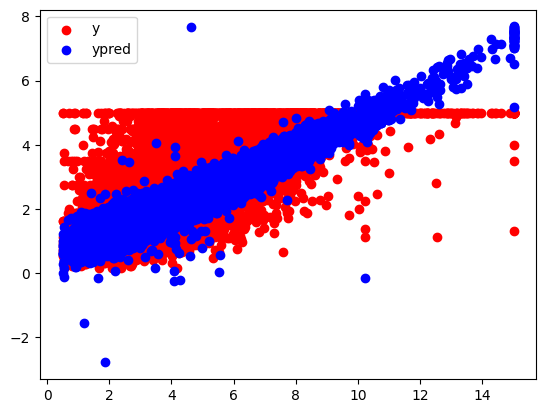

In [29]:
plt.scatter(X[ind,0], y[ind], color='red', label='y')
plt.scatter(X[ind,0], ypred[ind], color='blue', label='ypred')
plt.legend()
plt.show()


**EJERCICIO 2**

In [30]:
# EJERCICIO 2: Regresión Lineal con Regularización Ridge usando Descenso de Gradiente

# Generar un nuevo conjunto de datos sintético para este ejercicio
import numpy as np
np.random.seed(50) # Otra semilla para datos diferentes
num_muestras = 100
num_caracteristicas = 2
X_ridge = np.random.randn(num_muestras, num_caracteristicas)
# Generar y con un término de bias y coeficientes conocidos, más ruido
coeficientes_reales = np.array([[2.5], [-1.0]])
bias_real = 1.5
y_ridge = bias_real + X_ridge.dot(coeficientes_reales) + 0.7 * np.random.randn(num_muestras, 1)

# Añadir la columna de unos para el bias a X_ridge
X_ridge_b = np.c_[np.ones((num_muestras, 1)), X_ridge]

In [31]:
def calcular_costo_ridge(X, y, parametros, lambda_param):
    """Calcula la función de costo para la Regresión Ridge (MSE + término de regularización L2)."""
    m = len(y)
    predicciones = X.dot(parametros)
    error = predicciones - y
    costo_mse = (1/(2*m)) * np.sum(np.square(error))
    costo_regularizacion = (lambda_param / (2*m)) * np.sum(np.square(parametros[1:])) # No regularizamos el término de bias
    costo_total = costo_mse + costo_regularizacion
    return costo_total

In [32]:
def calcular_gradiente_ridge(X, y, parametros, lambda_param):
    """Calcula el gradiente de la función de costo para la Regresión Ridge."""
    m = len(y)
    predicciones = X.dot(parametros)
    error = predicciones - y
    gradiente_mse = (1/m) * X.T.dot(error)

    # Gradiente del término de regularización (derivada de lambda/2m * sum(theta[i]^2))
    gradiente_regularizacion = np.zeros_like(parametros)
    gradiente_regularizacion[1:] = (lambda_param / m) * parametros[1:] # No regularizamos el término de bias

    gradiente_total = gradiente_mse + gradiente_regularizacion
    return gradiente_total

In [33]:
def descenso_gradiente_ridge(X, y, parametros_iniciales, tasa_aprendizaje, num_iteraciones, lambda_param):
    """Aplica el descenso de gradiente para Regresión Ridge."""
    parametros = parametros_iniciales.copy()
    historial_costo = []

    for i in range(num_iteraciones):
        grad = calcular_gradiente_ridge(X, y, parametros, lambda_param)
        parametros = parametros - tasa_aprendizaje * grad
        costo_actual = calcular_costo_ridge(X, y, parametros, lambda_param)
        historial_costo.append(costo_actual)

    return parametros, historial_costo

Parámetros finales (theta) por gradiente descendente Ridge: [ 1.52127247  2.42994782 -0.81456983]
Costo final (Ridge): 0.2006319852456684


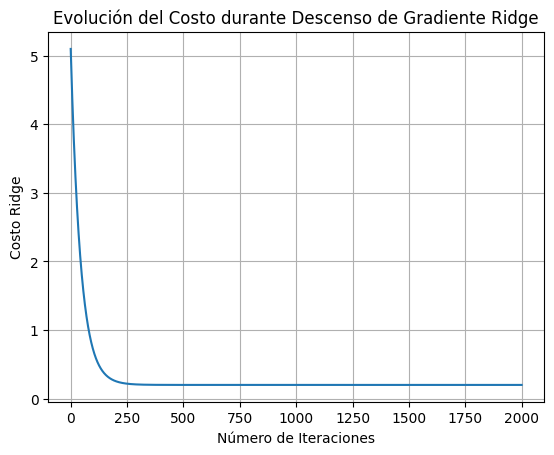

In [38]:
import matplotlib.pyplot as plt

# Inicialización de parámetros para el Ejercicio 2
parametros_iniciales_ridge = np.zeros((X_ridge_b.shape[1], 1))

# Hiperparámetros para el Descenso de Gradiente con Ridge
tasa_aprendizaje_ridge = 0.01
num_iteraciones_ridge = 2000 # Más iteraciones para asegurar convergencia
lambda_param_ridge = 0.1 # Parámetro de regularización

# Ejecutar el descenso de gradiente Ridge
parametros_optimos_ridge, historial_costo_ridge = descenso_gradiente_ridge(
    X_ridge_b, y_ridge, parametros_iniciales_ridge, tasa_aprendizaje_ridge, num_iteraciones_ridge, lambda_param_ridge)

print("Parámetros finales (theta) por gradiente descendente Ridge:", parametros_optimos_ridge.flatten())
print("Costo final (Ridge):", historial_costo_ridge[-1])

# Visualizar la evolución del costo
plt.plot(historial_costo_ridge)
plt.xlabel("Número de Iteraciones")
plt.ylabel("Costo Ridge")
plt.title("Evolución del Costo durante Descenso de Gradiente Ridge")
plt.grid(True)
plt.show()

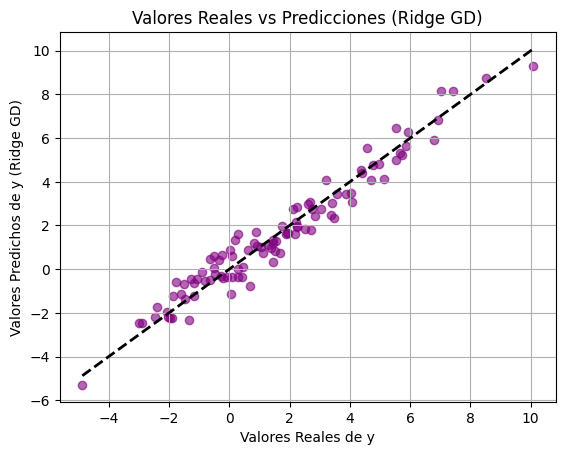

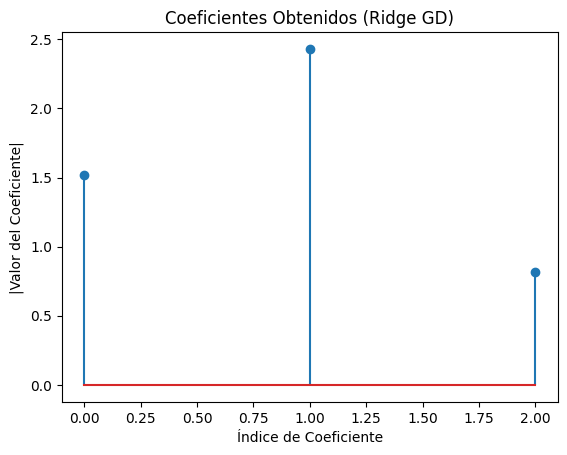

In [39]:
import matplotlib.pyplot as plt

# Predicciones con los parámetros finales de Ridge
predicciones_ridge = X_ridge_b.dot(parametros_optimos_ridge)

# Como tenemos 2 características + bias, no podemos graficar en 2D fácilmente vs una sola característica.
# Podríamos graficar y real vs y predicha, o graficar vs una de las características manteniendo las otras fijas (difícil).
# Mostraremos un scatter plot de los valores reales vs los predichos.

plt.scatter(y_ridge, predicciones_ridge, color='purple', alpha=0.6)
plt.xlabel("Valores Reales de y")
plt.ylabel("Valores Predichos de y (Ridge GD)")
plt.title("Valores Reales vs Predicciones (Ridge GD)")
plt.grid(True)
plt.plot([y_ridge.min(), y_ridge.max()], [y_ridge.min(), y_ridge.max()], 'k--', lw=2) # Línea de referencia y=x
plt.show()

# También podemos mostrar un stem plot de los coeficientes obtenidos
plt.stem(np.arange(len(parametros_optimos_ridge)), np.abs(parametros_optimos_ridge.flatten()))
plt.xlabel("Índice de Coeficiente")
plt.ylabel("|Valor del Coeficiente|")
plt.title("Coeficientes Obtenidos (Ridge GD)")
plt.show()

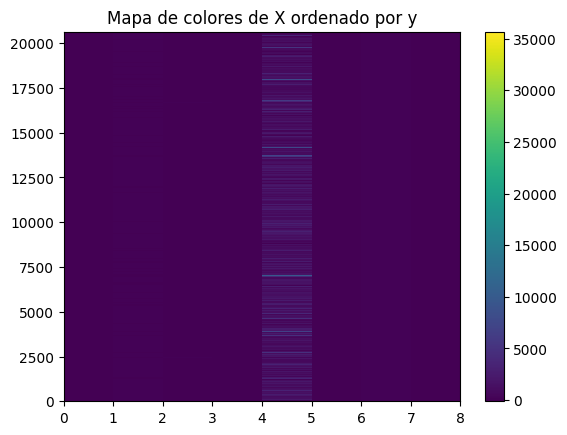

In [36]:
ind = np.argsort(y)
plt.pcolormesh(X[ind])
plt.colorbar()
plt.title("Mapa de colores de X ordenado por y")
plt.show()


In [40]:
# stem de los coeficientes obtenidos por gradiente (igual que en tu Colab con mincua_reg)
# Esta celda parece estar fuera de lugar y usa una variable no definida en este contexto.
# Se elimina para limpiar el código.

In [41]:
# Esta celda parece estar fuera de lugar y usa variables no definidas en este contexto.
# Se elimina para limpiar el código.

In [ ]:
U, S, Vh = np.linalg.svd(X, full_matrices=False)
plt.scatter(np.arange(len(S)), S)
plt.title("Valores singulares de X")
plt.xlabel("Índice")
plt.ylabel("Valor singular")
plt.show()
